# ODMR contrast vs distance from wire

In [12]:
import numpy as np 
import matplotlib.pyplot as plot 
import pandas as pd
import scipy.optimize as opt

In [2]:
def import_data(file):
    
    data = pd.read_table(file)
    return(data)

In [3]:
def set_plot_params():
    # formats the plot parameters 
    plot.rcParams.update({'font.size' : 20})
    plot.rcParams.update({'figure.figsize' :[12, 8]})

In [11]:
def linear(x, m , c):
    
    y = m*x + c
    return(y)

In [25]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [31]:
folder = 'H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\Coplanar Waveguides\\'
date = '20190807'
file = '20190807_reference_ODMR_analysis'

set_plot_params()

data = import_data(folder + date + '\\' + file + '.dat')

contrast = data['Contrast (%)']

distance_array = [-20.2, -17.6, -14.5, -5.0, -11.6, -8.9, -7.1, -4.0, 
                  -0.5, 3.2, 7.2, 9.7, 13.4, 17.0, 20.4, 23.8, 24.3, 30, 
                  34.6, 38.4]
wire_position = -20.5

distance_from_wire = np.array(distance_array) - wire_position
p0 = [-1.0,8]
fit_params, con = opt.curve_fit(linear, distance_from_wire, contrast, p0)
y = linear(distance_from_wire, fit_params[0], fit_params[1])
error = np.sqrt(np.diag(con))

rolling_average = moving_average(contrast, 5)
mean = np.mean(contrast)
std_contrast = np.std(contrast)

[-0.05340731  7.73786154] [0.02019663 0.65202003]


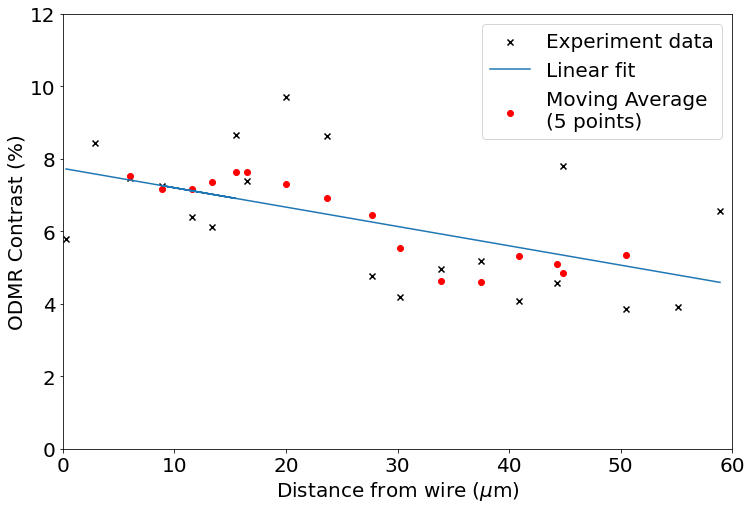

In [35]:
fig, ax = plot.subplots()
print(fit_params, error)
plot.scatter(distance_from_wire, contrast, marker = 'x', color = 'k', label = 'Experiment data')
plot.plot(distance_from_wire, y, label = 'Linear fit')
plot.scatter(distance_from_wire[2:-2], rolling_average, color = 'r', label = 'Moving Average \n(5 points)')
#plot.plot([0,70], [mean, mean], color = 'r', linestyle = '-', label = 'Mean Contrast')
#plot.plot([0,70], [mean+std_contrast, mean+std_contrast], color = 'b', linestyle = '--', label = r'Mean Contrast  $\pm$ std(Contrast)')
#plot.plot([0,70], [mean-std_contrast, mean-std_contrast], color = 'b', linestyle = '--')
plot.legend()
plot.axis([0, 60, 0, 12])
plot.xlabel(r'Distance from wire ($\mu$m)')
plot.ylabel('ODMR Contrast (%)')

#fig.savefig(folder + 'contrast_vs_distance_to_wire.pdf')

In [36]:
(3.85 - 7.7)/0.05

-77.0

In [38]:
5*2*0.077

0.77